<a href="https://colab.research.google.com/github/Sanafamma/Machine-Learning-with-Python/blob/master/ANIMAL_FACE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow   #for NN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Import Dictionary 
#importing Dependicies
import os
import xml.etree.ElementTree as et
import re
import pandas as pd
import numpy as np  
import seaborn as sns

import cv2 as cv2
from cv2 import CascadeClassifier, rectangle
from cv2 import destroyAllWindows

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.patches import Rectangle, Circle

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV





#libraries and modules to implement layers of NN
import tensorflow as tf
import keras
from keras import layers
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical



In [ ]:
!pip install kaggle   #for sake of dataset downlaod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()                #choose file from folder

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdurrehman809","key":"cef4ad3464a0600ad64d65bd4e975302"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces   #download dataset file

animal-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

afhq		  haarcascade_frontalcatface.xml  kaggle.json
animal-faces.zip  haarcascade_profileface.xml	  sample_data


In [ ]:
!unzip animal-faces

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

In [ ]:
!ls   #showing files in Directory

afhq  animal-faces.zip	kaggle.json  sample_data


In [ ]:
# Pre-processing
import os

folder_path = '/content/afhq/train'
subfolders = ['cat', 'dog','wild']
num_images = 4500

for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    file_names = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
    count = 0

    for file_name in file_names:
        if count >= num_images:
            break

        if file_name.endswith('.jpg') or file_name.endswith('.png'):  # Specify the file extensions of images to delete
            file_path = os.path.join(subfolder_path, file_name)
            os.remove(file_path)
            print(f"Deleted {file_name}")
            count += 1


Streaming output truncated to the last 5000 lines.
Deleted pixabay_dog_003565.jpg
Deleted flickr_dog_000686.jpg
Deleted pixabay_dog_001725.jpg
Deleted pixabay_dog_003573.jpg
Deleted pixabay_dog_002454.jpg
Deleted pixabay_dog_003270.jpg
Deleted flickr_dog_000055.jpg
Deleted flickr_dog_000725.jpg
Deleted flickr_dog_000724.jpg
Deleted pixabay_dog_002429.jpg
Deleted pixabay_dog_000421.jpg
Deleted pixabay_dog_000488.jpg
Deleted flickr_dog_000783.jpg
Deleted flickr_dog_000122.jpg
Deleted pixabay_dog_000309.jpg
Deleted flickr_dog_000645.jpg
Deleted pixabay_dog_001316.jpg
Deleted pixabay_dog_001180.jpg
Deleted pixabay_dog_000648.jpg
Deleted pixabay_dog_003339.jpg
Deleted pixabay_dog_003739.jpg
Deleted flickr_dog_000888.jpg
Deleted flickr_dog_000723.jpg
Deleted flickr_dog_000661.jpg
Deleted pixabay_dog_003719.jpg
Deleted pixabay_dog_002048.jpg
Deleted flickr_dog_000831.jpg
Deleted flickr_dog_000447.jpg
Deleted pixabay_dog_001254.jpg
Deleted flickr_dog_000830.jpg
Deleted pixabay_dog_000721.jpg
D

In [ ]:
import cv2
import os

# Define the main folder path and subfolder names
main_folder_path = '/content/afhq/train'
subfolder_names = ['cat', 'dog', 'wild']

labels = []
images = []

for subfolder_name in subfolder_names:
    subfolder_path = os.path.join(main_folder_path, subfolder_name)

    for file_name in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file_name)
        image = cv2.imread(file_path, cv2.COLOR_BGR2RGB)
        labels.append(subfolder_name)
        images.append(image)

print("Number of images:", len(images))
print("Number of labels:", len(labels))


Number of images: 1130
Number of labels: 1130


In [ ]:
# Feature Extraction also using the accuracy on SVC 
import os
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Path to the folder containing animal categories
base_dir = '/content/afhq/train'

# Define the list of categories
categories = ['cat', 'dog', 'wild']

# Process images in each category
features_list = []
labels_list = []
for category in categories:
    category_dir = os.path.join(base_dir, category)
    image_files = os.listdir(category_dir)
    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        features = extract_features(img_path)
        features_list.append(features)
        labels_list.append(category)

features_array = np.array(features_list)
labels_array = np.array(labels_list)

flattened_features = features_array.reshape(features_array.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(flattened_features, labels_array, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"\nClassification Report:\n{report}")


1/1 [==============================] - 0s 84ms/step
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00       136
         dog       1.00      1.00      1.00        44
        wild       1.00      1.00      1.00        46

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



In [ ]:
# accuracy on Random Forest Classification 
features_array = np.array(features_list)
labels_array = np.array(labels_list)

X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.9911504424778761

Classification Report:
               precision    recall  f1-score   support

         cat       1.00      1.00      1.00       136
         dog       0.96      1.00      0.98        44
        wild       1.00      0.96      0.98        46

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



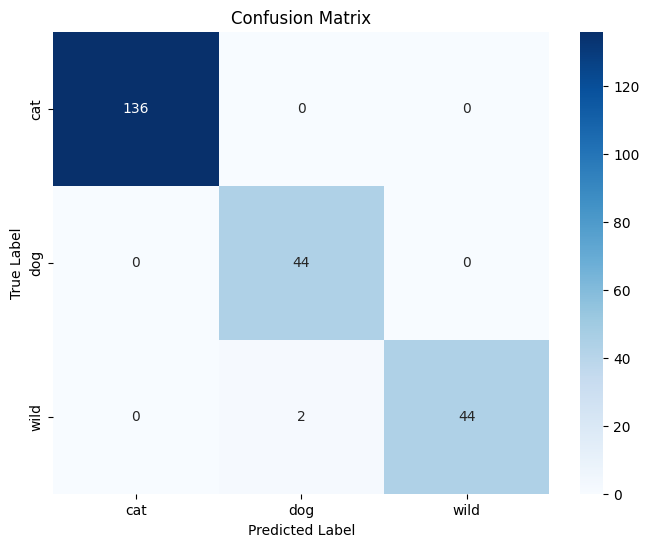

In [ ]:
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()